<a href="https://colab.research.google.com/github/KeanDevDev/skill-25/blob/main/SKILL_EXTP_7_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [27]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df1=pd.read_csv('/content/sample_data/california_housing_test.csv')
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [29]:
print(df1.columns)

print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [30]:
import numpy as np
import pandas as pd
from scipy.stats import zscore


z_scores = df.apply(zscore)


outliers = (np.abs(z_scores) > 3)


print("Z-scores:\n", z_scores)
print("\nOutliers (True means it's an outlier):\n", outliers)


outlier_values = df[outliers]
print("\nOutlier Values:\n", outlier_values)


Z-scores:
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunctio

Outlier Values:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0           NaN       NaN                 NaN          NaN             NaN   
1           NaN       NaN                 NaN          NaN             NaN   
2           NaN       NaN                 NaN          NaN             NaN   
3           NaN       NaN                 NaN          NaN             NaN   
4           NaN       NaN                 NaN          NaN             NaN   
...         ...       ...                 ...          ...             ...   
2995        NaN       NaN                 NaN          NaN             NaN   
2996        NaN       NaN                 NaN          NaN             NaN   
2997        NaN       NaN                 NaN          NaN             NaN   
2998        NaN       NaN                 NaN          NaN             NaN   
2999        NaN       NaN                 NaN          NaN             NaN   

      population  households  median_income  m

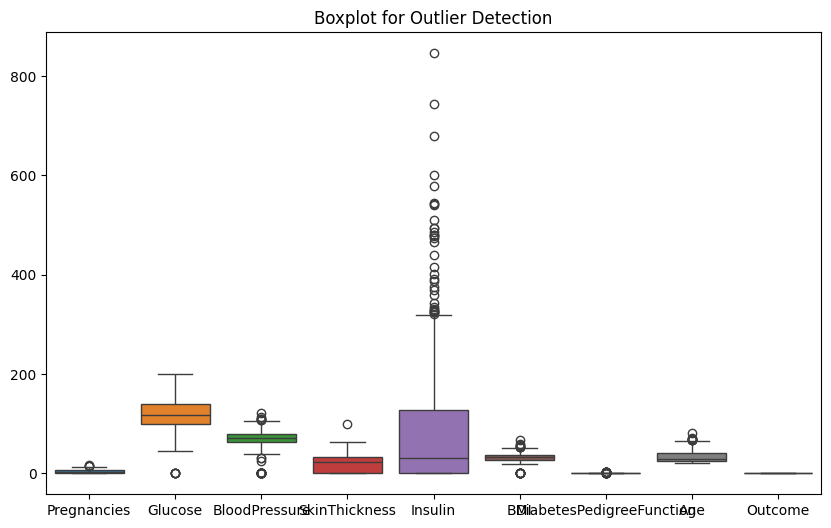

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)


IQR = Q3 - Q1


outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


print("Outlier Values:\n", df1[outliers])


plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.show()


In [32]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
y=df[['Outcome']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


X_train.shape, X_test.shape

((537, 8), (231, 8))

In [33]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

sum(var_thres.get_support())

len(X_train.columns[var_thres.get_support()])

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


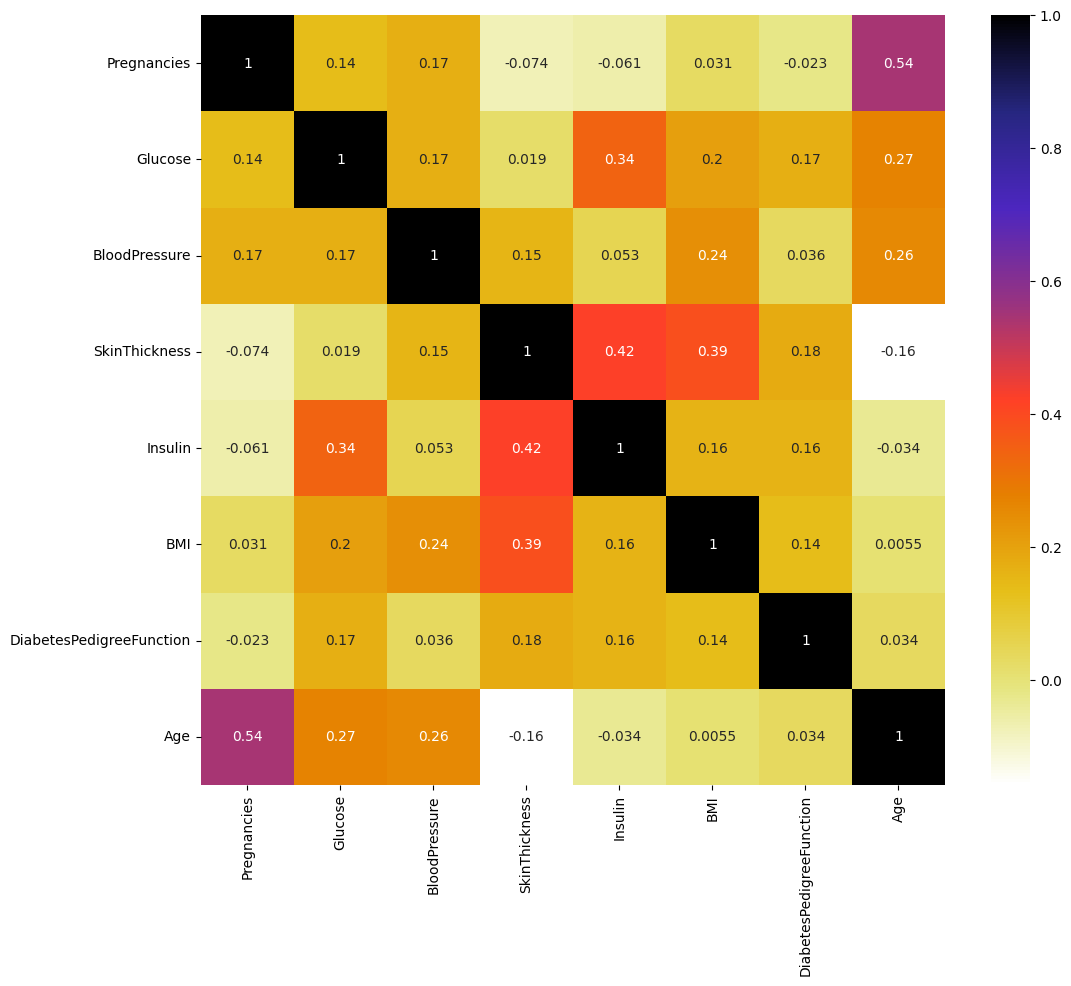

In [34]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [35]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

corr_features

set()

In [37]:

X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37



Selected Features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
Removed Features: ['SkinThickness', 'BloodPressure', 'DiabetesPedigreeFunction']

Pearson's Correlation Coefficients:
              Pregnancies   Glucose   Insulin       BMI       Age
Pregnancies     1.000000  0.138310 -0.061448  0.030913  0.544940
Glucose         0.138310  1.000000  0.339681  0.203764  0.267994
Insulin        -0.061448  0.339681  1.000000  0.159097 -0.033702
BMI             0.030913  0.203764  0.159097  1.000000  0.005542
Age             0.544940  0.267994 -0.033702  0.005542  1.000000


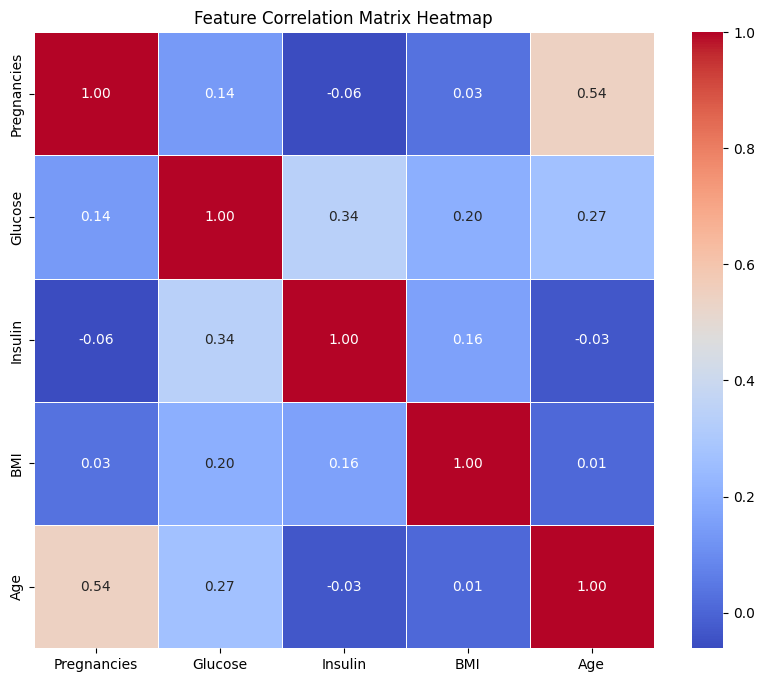

Chi-Square test for Pregnancies: p-value = 2.1674667483237296e-07
Chi-Square test for Glucose: p-value = 1.3692759315668132e-28
Chi-Square test for Insulin: p-value = 0.0007614875910295332
Chi-Square test for BMI: p-value = 1.5308591119252297e-12
Chi-Square test for Age: p-value = 7.712772700840678e-10
ANOVA test for Pregnancies: p-value = 4.25313559852502e-06
ANOVA test for Glucose: p-value = 4.3915882147175373e-32
ANOVA test for Insulin: p-value = 0.001669823442926965
ANOVA test for BMI: p-value = 1.4530145864430418e-14
ANOVA test for Age: p-value = 4.0178919796387296e-11

Information Gain for each feature:
Information Gain for Pregnancies: 0.0687
Information Gain for Glucose: 0.3749
Information Gain for Insulin: 0.3236
Information Gain for BMI: 0.4230
Information Gain for Age: 0.1820


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model Accuracy Comparison:
Logistic Regression Accuracy: 0.7229
K-Nearest Neighbors Accuracy: 0.6710
Random Forest Accuracy: 0.7186


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.stats import chi2_contingency, f_oneway
from math import log2

# Assuming df is already loaded with data

# Separate features and target
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using Mutual Information
def select_features(X, y, k=5):
    selector = SelectKBest(score_func=mutual_info_classif, k=min(k, X.shape[1]))
    selector.fit(X, y.values.ravel())  # Convert y to 1D array
    selected_features = X.columns[selector.get_support()].tolist()
    removed_features = list(set(X.columns) - set(selected_features))
    return selected_features, removed_features

# Get selected and removed features
selected_features, removed_features = select_features(X_train, y_train)

print("\nSelected Features:", selected_features)
print("Removed Features:", removed_features)

# Update X_train and X_test to use only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Function to calculate entropy
def entropy(y):
    p_pos = np.sum(y == 1) / len(y)
    p_neg = 1 - p_pos
    if p_pos == 0 or p_neg == 0:  # Avoid log(0)
        return 0
    return -p_pos * log2(p_pos) - p_neg * log2(p_neg)

# Function to calculate information gain
def information_gain(X, feature, y):
    total_entropy = entropy(y)

    # Get unique values of the feature
    values = X[feature].unique()

    weighted_entropy = 0
    for value in values:
        subset_y = y[X[feature] == value]
        weighted_entropy += (len(subset_y) / len(y)) * entropy(subset_y)

    return total_entropy - weighted_entropy

# Pearson's Correlation Coefficient
correlation_matrix = X_train.corr()
print("\nPearson's Correlation Coefficients:\n", correlation_matrix)

# Create heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix Heatmap")
plt.show()

# Chi-Square Test for independence (use only categorical variables)
X_discrete = X_train.copy()
for feature in X_train.columns:
    X_discrete[feature] = pd.cut(X_train[feature], bins=5, labels=False)  # Discretize continuous variables into 5 bins

# Chi-Square Test between each feature and the target
for feature in X_discrete.columns:
    contingency_table = pd.crosstab(X_discrete[feature], y_train['Outcome'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {feature}: p-value = {p}")

# ANOVA test to check if continuous features differ significantly based on the target
group_0 = X_train[y_train['Outcome'] == 0]
group_1 = X_train[y_train['Outcome'] == 1]

for feature in X_train.columns:
    f_stat, p_value = f_oneway(group_0[feature], group_1[feature])
    print(f"ANOVA test for {feature}: p-value = {p_value}")

# Calculate Information Gain for each feature
print("\nInformation Gain for each feature:")
for feature in X_train.columns:
    ig = information_gain(X_train, feature, y_train['Outcome'])
    print(f"Information Gain for {feature}: {ig:.4f}")

# Model training and accuracy comparison
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print out the accuracies of all models
print("\nModel Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
